## Single Value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import scipy 
scipy.__version__
import scipy.stats as stats

In [2]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:3]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


### y : 연속형
    - 단일 변수의 정규성 여부 판단 필
        - 여기도 가설을 세우고 판단함.
        - 검증 개수 따른 방법 선택
                - 5000 이하: shapiro normality test
                - 5000 이상: anderson normality test

#### 선정변수 
        1. 'age'(연속)
            → 분석 내용: 나이가 정규분포를 따르는가?
                - 귀무가설: 나이가 정규분포이다. 
                - 대립가설: 나이가 정규분포가 아니다.
            → 분석 결론 (p-value : 0.05?)
                - 통계 결론: 
                - 사실 결론: 

- 1. age에 대해 시각화
- 2. age에 대해 p-value

In [3]:
df_age = df_TOCC['age']
df_age

0        43.0
1        62.0
2        60.0
3        60.0
4        51.0
         ... 
51299     NaN
51300    39.0
51301    51.0
51302    64.0
51303    53.0
Name: age, Length: 51304, dtype: float64

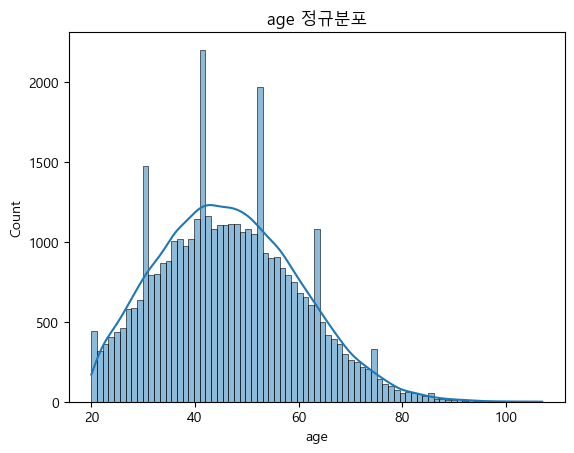

In [6]:
sns.histplot(data=df_TOCC, x='age', kde=True, discrete=False)
plt.title('age 정규분포')
plt.show()

In [ ]:
df_TOCC_age=df_TOCC['age'].dropna()

In [ ]:
df_TOCC_age.count()

In [ ]:
stats.anderson(df_TOCC_age)

#### 선정변수 
        1. 'age' (연속), 'Mileage' (연속)
            → 분석 내용: 나이에 따른 마일리지 변화?
                - 귀무가설: 나이에 따른 마일리지 변화 없음.
                - 대립가설: 나이에 따른 마일리지 변화 있음.
            → 분석 결론 (p-value : 0.05 ?), stats.pearsonr('비교1', '비교2')
                ⇒ PearsonRResult(statistic=0.9732809346109912, pvalue=0.0)
                - 통계 결론: statistic_0.97, p-value < 0.05 이므로 대립가설 참
                - 사실 결론: 나이에 따른 마일리지 변화 있다.
            → correlation의 유의미함을 보려면 pearsonr을 사용한다.   